# Augmenting images with computer vision techniques
CNNs and computer vision are inseparable in deep learning. Before we dig deeper into the applications of deep learning for computer vision, we will introduce basic computer vision techniques that you can apply in your deep learning pipeline to make your model more robust. Augmentation can be used during training to increase the number of distinct examples and make your model more robust for slight variations. Moreover, it can be used during testing—Test Time Augmentation (TTA). Not every augmentation is suitable for every problem. For example, flipping a traffic sign with an arrow to the left has a different meaning than the original. We will be implementing our augmentation function with OpenCV.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

### Load some sample images that we will use and plot them

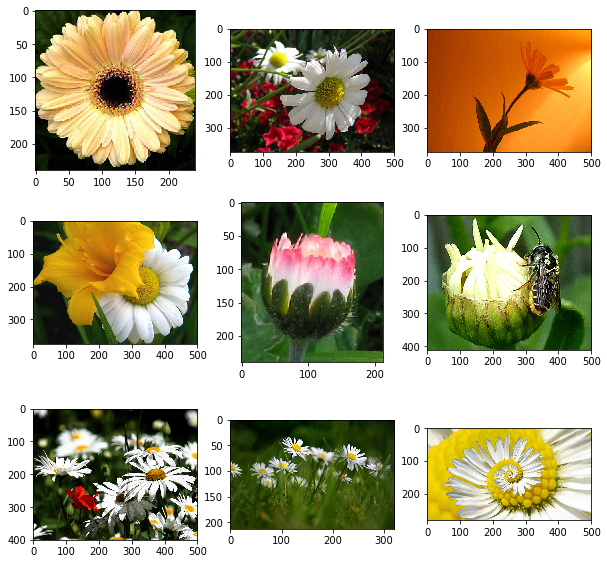

In [2]:
# The data folder has only 3 images
DATA_DIR = 'data/Cat/'
images = glob.glob(DATA_DIR + '*')

plt.figure(figsize=(10, 10))
i = 1
for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i)
    plt.imshow(img)
    i += 1
    
plt.show()

### Defining a function to easily plot examples of our augmentations

In [3]:
def plot_images(image, function, *args):
    plt.figure(figsize=(10, 10))
    n_examples = 3
    for i in range(n_examples):
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = function(img, *args)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
    plt.show()

### Define a function to randomly rotate an image and plot some examples

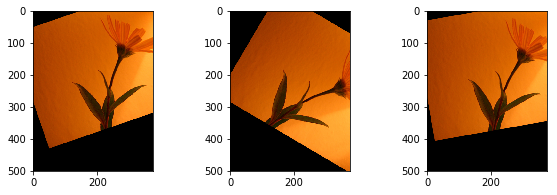

In [4]:
def rotate_image(image, rotate=20):
    width, height, _ = image.shape
    random_rotation = np.random.uniform(low=-rotate, high=rotate)
    M = cv2.getRotationMatrix2D((width/2, height/2), random_rotation, 1)
    return(cv2.warpAffine(image, M, (width, height)))

plot_images(images[2], rotate_image, 40)

### Define a function to adjust the brightness of an image

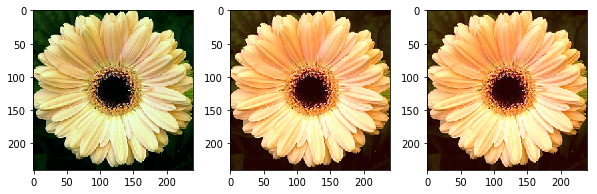

In [5]:
 def adjust_brightness(image, brightness=60):
    rand_brightness = np.random.uniform(low=-brightness, high=brightness)
    return(cv2.add(image, rand_brightness))

plot_images(images[0], adjust_brightness, 85)

### Define a function to randomly shift an image

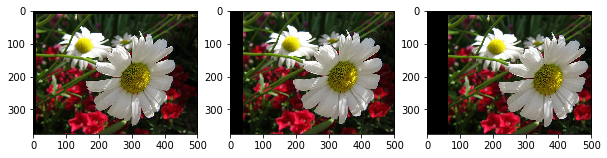

In [6]:
def random_shifts(image, shift_max_x=100, shift_max_y=100):
    width, height, _ = image.shape
    shift_x = np.random.randint(shift_max_x)
    shift_y = np.random.randint(shift_max_y)
    M = np.float32([[1, 0, shift_x],[0, 1, shift_y]])
    return (cv2.warpAffine(image, M, (height, width)))

plot_images(images[1], random_shifts, 100, 20)

### Define a function to scale up or down an image

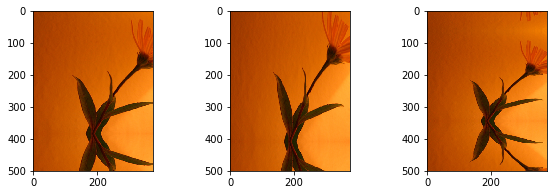

In [7]:
def scale_image(image, scale_range=[0.6, 1.4]):
    width, height, _ = image.shape    
    
    scale_x = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_y = np.random.uniform(low=scale_range[0], high=scale_range[1])
    scale_matrix = np.array([[scale_x, 0., (1. - scale_x) * width / 2.], 
                             [0., scale_y, (1. - scale_y) * height / 2.]], 
                            dtype=np.float32)
    return(cv2.warpAffine(image, scale_matrix, (width, height), flags=cv2.INTER_LINEAR, 
                         borderMode=cv2.BORDER_REFLECT_101))

plot_images(images[2], scale_image, [0.7, 1.3])

### Define a function to randomly flip an image

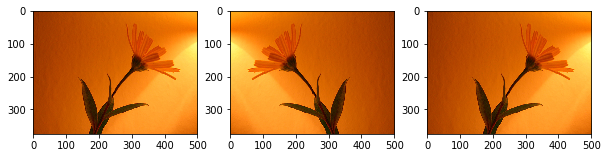

In [8]:
def random_flip(image, p_flip=0.5):
    rand = np.random.random()
    if rand < p_flip:
        image = cv2.flip(image, 1)
    return image

plot_images(images[2], random_flip)

Most deep learning frameworks have their own implementations for image augmentations. For example, for PyTorch, take a look at torchvision.transforms . These transformations make it easy to add augmentations such as random cropping
and flipping to your data. In Keras, you can use ImageDataGenerator for random augmentation.